In [1]:
import numpy as np # math library, simulation of random variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # more fancy stats visualization
from scipy import stats # stats library
from scipy import optimize # optimization library 
import statsmodels.api as sm # statistical modeling library

# Classical distributions

In python, we can use the library scipy as a probability toolbox, see https://docs.scipy.org/doc/scipy/reference/stats.html. The general use is to find the law that we want to use (a normal distribution in the example below) and to use the functions from the library. Each distribution is represented as an object, of which many attribute can be computed (see the documentation). For example law.cdf gives the CDF, law.pdf gives the PDF (i.e. the density) and law.ppf is the inverse CDF (quantile function). 

Theorical mean: 2.00
Theorical variance: 9.00


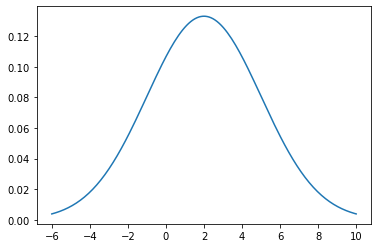

In [2]:
from scipy.stats import norm
law = norm(2,3)
mean, var = law.stats(moments='mv')
print("Theorical mean: %.2F" %mean)
print("Theorical variance: %.2F" %var)

#let's plot the density
x = np.linspace(-6, 10, num=150)
plt.plot(x, law.pdf(x), label='norm pdf')

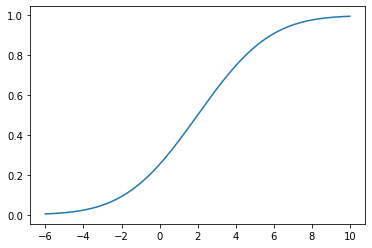

In [3]:
# .. and the cdf 
plt.plot(x, law.cdf(x), label='norm cdf')

**Small exercice:** find the value $q_{\alpha}$ such that $\mathbb{P}_{Z \sim \mathcal{N}(0,1)}(Z \leq q_{\alpha}) = 1 - \alpha$ for $\alpha=0.025$.

In [4]:
law=stats.norm(0,1)
q = law.ppf(1-0.025)
print("q is",q)

q is 1.959963984540054


Now let's take an example of discrete distribution that we saw in class: the Poisson distribution. The cells below visualizes the probability mass function ("density") of a Poisson distribution with parameter $\lambda = 3$ and its cdf.

<StemContainer object of 3 artists>

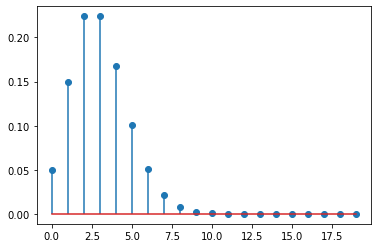

In [5]:
law = stats.poisson(3)
xplot = np.arange(20)
plt.stem(xplot,law.pmf(xplot),use_line_collection=True)

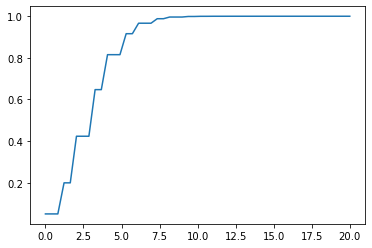

In [6]:
xplot = np.linspace(0,20)
plt.plot(xplot,law.cdf(xplot))

In [7]:
mean,variance = law.stats(moments='mv')
print("the mean is",mean,"and the variance is",variance)

the mean is 3.0 and the variance is 3.0


**Small exercice:** for $Z \sim \mathcal{P}(3)$, find the values of $\mathbb{P}(Z=3), \mathbb{P}(Z \leq 2)$ and $\mathbb{P}(Z\geq 4)$

In [8]:
print("P(Z = 3)=",law.pmf(1))
print("P(Z \leq 2)=",law.cdf(2))
print("P(Z \geq 4)=",1-law.cdf(3))

P(Z = 3)= 0.14936120510359185
P(Z \leq 2)= 0.42319008112684364
P(Z \geq 4)= 0.35276811121776874


# Generating $n$-samples

The library numpy can simulate a sample from most usual probability laws. To generate a random sample, the algorithm depends on a sample from a uniform distribution $\mathcal{U}[0,1]$, this is the basic building block. To estimate a uniform distribution, one use a recurrent sequence and the difference between two terms of this sequence mimics the properties of i.i.d sample uniform law. As for all sequence, we need to initialize the sequence with a seed.

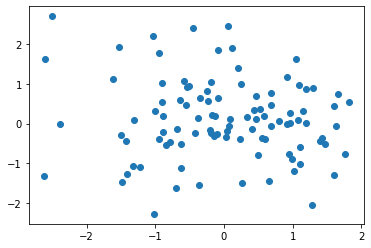

In [11]:
n = 100 # Sample size
# initialize a random number generator
rng = np.random.RandomState(2024)
X = rng.normal(size=[n,2]) # random sampling from a standard normal distribution in dimension 2
plt.scatter(X[:,0],X[:,1]) # scatter plot of X

You can also directly call np.random.normal, but the seed will be changed each time you re-evaluate the cell. See the difference below. 

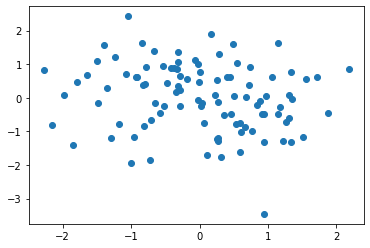

In [12]:
X = np.random.normal(size=[n,2]) # random sampling 
plt.scatter(X[:,0],X[:,1]) # scatter plot of X

# Checking the adequation to a model

Below, we use np.random.exponential to sample $n=100$ points from an exponential distribution with mean $2$ (and therefore parameter $1/2$) and represent these points on the graph using the code below. You can execute several time the cell for several different samples to visualize the randomness.

mean is 2.0 and variance is 4.0


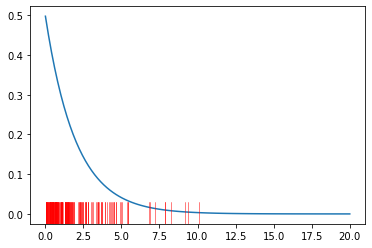

In [25]:
n=200
mean = 2

law = stats.expon(scale = mean)
mean,variance=law.stats(moments='mv')
print("mean is",mean,"and variance is",variance)

xplot = np.linspace(0.01,20,num=100)
plt.plot(xplot,law.pdf(xplot))

X = np.random.exponential(mean,size=n) # our n-sample
for Xi in X:
    plt.axvline(Xi, 0, 0.1, c='red', linewidth = 0.5) # we plot a vertical line for each sample point.

Using vertical bars on the x-axis to vizualize the data is not very nice, instead we can use an histogram that count how many sample are in a given bin and plot a bar with a height corresponding to the number of points in the bin (renormalized by the total number of sample). 

(array([0.49117524, 0.31256606, 0.23814557, 0.12651483, 0.05209434,
        0.08930459, 0.06697844, 0.0297682 , 0.0148841 , 0.        ,
        0.02232615, 0.0148841 , 0.00744205, 0.0148841 , 0.00744205]),
 array([ 0.02123204,  0.69309002,  1.36494799,  2.03680597,  2.70866394,
         3.38052192,  4.05237989,  4.72423787,  5.39609584,  6.06795382,
         6.7398118 ,  7.41166977,  8.08352775,  8.75538572,  9.4272437 ,
        10.09910167]),
 <a list of 15 Patch objects>)

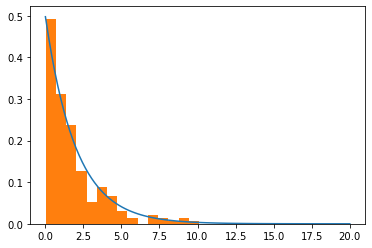

In [26]:
plt.plot(xplot,law.pdf(xplot))
plt.hist(X, density=True,bins=15)

Now let's pretend that we observe the sample $X$ without knowing that it was generated from the distribution $\mathcal{E}(1/3)$. How do we check the adequation of this sample to this particular distribution? A first possibility is to look at the above histogram. Another possible way it to compare the empirical CDF $\widehat{F}_n$ to $F$, the cdf of the distribution that has generated the sample. Recall that the empirical cdf is defined as $$\widehat{F}_n(t) = \frac{1}{n}\sum_{i=1}^{n} \mathbb{1}(X_i \leq x)$$
and we know that if the sample $X$ comes from a distribution with cdf $F$, $\widehat{F}_n(t)$ converges almost surely to $F(t)$, for all $t\in \mathbb{N}$.

Let's verify this convergence graphically. The code below plots on the same graph the true CDF and the empirical CDF.  

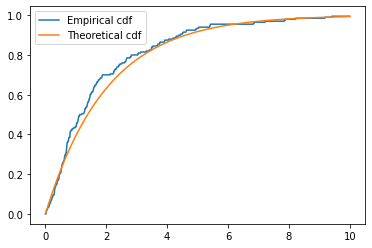

(array(2.), array(4.))


In [27]:
xplot = np.linspace(0,10,num=1000)

def empirical_cdf(t):
    return np.sum(X<=t)/n 

y_ecdf = [empirical_cdf(t) for t in xplot] # values of the empirical cdf on xplot
y_cdf = law.cdf(xplot) # values of the theoretical cdf on xplot

plt.plot(xplot,y_ecdf,label='Empirical cdf')
plt.plot(xplot,y_cdf,label='Theoretical cdf')
plt.legend()
plt.show()
print(law.stats(moments="mv"))

Another way to assess the fit to a certain distribution is to use a so-called quantile-quantile plot (QQ-plot). The principle is to compare the empirical quantiles to the theoretical quantiles of the law. The empirical quantile of level $\alpha$, $\widehat{q}_{n,\alpha}$, for a sample $(X_1,\dots,X_n)$ is defined as the quantile of order $\alpha$ of the empirical cdf $\widehat{F}_n$. For all $\alpha$, the empirical quantile $\widehat{q}_{n,\alpha}$ is an estimators of the theoretical quantile, given by $F^{-1}(\alpha)$ if the sample is indeed drawn under the distribution $F$. 

The QQ-plot is the plot of the points $\left(\widehat{q}_{n,i},F^{-1}\left(\frac{i}{n+1}\right)\right)$ for $1\le i\le n$. We consider the distribution $F$ to be a good fit if these points are close to be aligned on the line $y=x$, as we should have $\widehat{q}_{n,i} \simeq F^{-1}\left(\frac{i}{n+1}\right)$ for all $i$. 

QQ-plot is implemented in the package statsmodel, see the [documentation](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) of the qqplot function. 

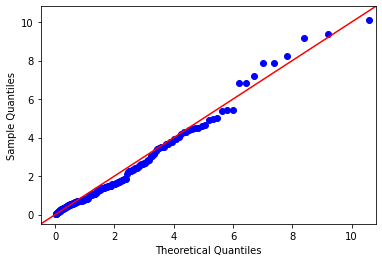

In [28]:
sm.qqplot(X,law, line="45") 
plt.show()

# Comparing two estimators

Suppose that $X_1,\dots,X_n$ is an i.i.d sample drawn from some exponential distribution. 

We recall that the density of an exponential distribution with parameter $\theta$ is
$$f_{\theta}(x) = \theta \exp(-\theta x) \mathbb{1}_{[0,+\infty[}(x)$$
and its cdf is $$F_{\theta}(t) = (1 - \exp(-\theta t)) \mathbb{1}_{[0,+\infty[}(t).$$
We are interested in estimating the mean of this distribution, $\mu$, which satisfies $\mu = 1/\theta$.

A first obvious estimator is the moment estimator (which coincides with the MLE), $\widehat{\mu}_n = \frac{1}{n}\sum_{i=1}^{n} X_i$.

For the second estimator, we rely on the observation that the median of the exponential distribution can be easily related to the mean. Indeed, the median (of a continuous distribution) is the value $m$ such that $\mathbb{P}(X\leq m) = \frac{1}{2}$. Using the expression of the CDF, we have $m = \mu \log(2)$ and therefore we propose the estimator 
$$\widetilde{\mu}_n = \frac{1}{\log(2)} \mathrm{median}(X_1,\dots,X_n),$$
where $\mathrm{median}(X_1,\dots,X_n)$ is the median of the empirical distribution. If $n$ is odd, its value is $X_{i_{med}}$ where the number of $X_i$'s strictly smaller than $X_{i_{med}}$ is equal to the number of $X_i$'s strictly greater than $X_{i_{med}}$.

We propose to compare these two estimators, first for a fixed sample size and then in an asymptotic regime. 

## Biais, variance and mean-square error

Computing the bias and variance of $\widehat{\mu}_n$ is quite straightfoward. As we saw multiple time in class for a $n$ sample, $\mathbb{E}[\widehat{\mu}_n] = \mathbb{E}[X_1]$ and $\mathrm{Var}[\widehat{\mu}_n] = \frac{\mathrm{Var}[X_1]}{n}$.

For $\widetilde{\mu}_n$, we can prove that 
$$\mathbb{E}[\mathrm{median}(X_1,\dots,X_n)]=\mu\sum_{i=1}^{\lceil n/2\rceil}\frac{1}{n-i+1}\quad \text{and}\quad \mathrm{Var}(\mathrm{median}(X_1,\dots,X_n))=\mu^2\sum_{i=1}^{\lceil n/2\rceil}\frac{1}{(n-i+1)^2}$$

**Compute the biais and variance of these two estimator, for $n = 51$ and $\mu=3$. Which one is better?** 

In [32]:
mu = 3 
n = 51

bias1 = 0
variance1 = mu**2/n

bias2 = mu*np.sum([1/(n-i+1) for i in range(1,int(np.ceil(n/2)+1))])/np.log(2)-mu
variance2 = mu**2*np.sum([1/(n-i+1)**2 for i in range(1,int(np.ceil(n/2)+1))])/np.log(2)**2

print("moment estimator: biais",bias1,"and variance",variance1)
print("median-based estimator: biais",bias2,"and variance",variance2)

moment estimator: biais 0 and variance 0.17647058823529413
median-based estimator: biais 0.04201628496296639 and variance 0.3707837660011899


Both the biais and variance are larger for the second estimator (hence the mean-square error too). 

In [33]:
print("MSE of moment estimator: ",bias1**2+variance1)
print("MSE of median-based estimator:",bias2**2+variance2)

MSE of moment estimator:  0.17647058823529413
MSE of median-based estimator: 0.37254913420327906


## Distribution of the estimators

It is possible go further than expectation-based metrics and to visualize (an approximation of) the *distributions* of the two estimators $\widehat{\mu}_n$ and $\widetilde{\mu}_n$, still for $n=51$ and when the underlying $n$-sample is generated from an exponential distribution with mean $\mu=3$.

To do so, we resort to simulation. We do $M$ simulations. In each simulation $i \leq M$, we begin by sampling a $n$-sample $X^{(i)}$ according to an exponential distribution of mean $\mu = 3$, then we compute the values of the estimators for this $X^{(i)}$, $\widehat{\mu}_n^{(i)}$ and $\widetilde{\mu}_n^{(i)}$. This provides $M$ samples $(\widehat{\mu}_n^{(1)},\dots,\widehat{\mu}_n^{(M)})$ from the distribution of $\widehat{\mu}_n$, and similarly $M$ samples from the distribution of $\widetilde{\mu}_n$.

We can then visualize the (empirical) distribution given by these samples, by looking at a histogram or a boxplot. 

In [34]:
M = 100 # Number of different simulations
n = 51 # sample size for each simulation

samples_mu1 = []
samples_mu2 = []
for i in range(M):
    rng = np.random.RandomState(i) # choose a different seed for each experiment
    X = rng.exponential(mu, size=n) # generate a n-sample
    samples_mu1.append(np.mean(X)) # computing the first estimator and adding it to the list of samples
    samples_mu2.append(np.median(X)/np.log(2)) # computing the second estimator and adding it to the list of samples

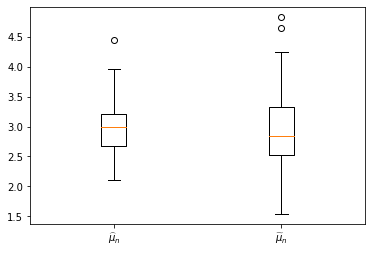

In [35]:
# box plot
plt.boxplot([samples_mu1,samples_mu2], labels=['$\widehat \mu_n$','$\widetilde \mu_n$'])
plt.show()

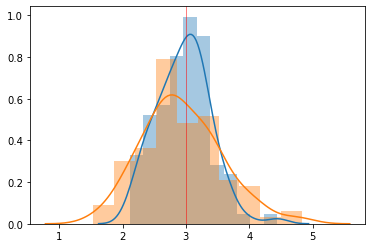

In [36]:
# histogram + attempt at fitting a density (fancy seaborn visualization)
sns.distplot(samples_mu1)
sns.distplot(samples_mu2)
plt.axvline(mu, 0, 1, c='red', linewidth = 0.5)
plt.show()

## Asymptotic normality 

Clearly, the estimator $\widetilde{\mu}_n$ is worse than $\widehat{\mu}_n$, for a fixed sample size $n=51$. But could it still be somewhat good when the sample size goes large? Is it in particular asymptotically normal? This is what we try to answer here. 

**Using again $M$ simulations, generate $M$ samples from the distribution of $\sqrt{n}(\widetilde{\mu}_n- \mu)$ but for a large enough value and $n$ and check whether it looks Gaussian**.

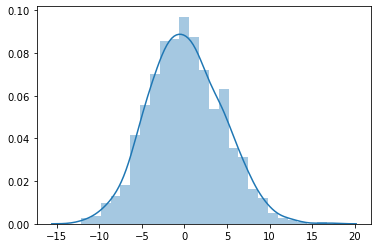

In [37]:
M = 1000
n = 500

samples = []
for i in range(M):
    rng = np.random.RandomState(i) 
    X = rng.exponential(mu, size=n)
    samples.append(np.sqrt(n)*(np.median(X)/np.log(2) - mu))

sns.distplot(samples)

**How could you approximate its asymptotic variance? Compare it to that of $\widehat{\mu}_n$.**

Letting $Y = \sqrt{n}(\widetilde{\mu}_n - \mu)$, we are looking for $\sigma$ such that $Y/\sigma$ is a standard Gaussian. Letting $Z \sim \mathcal{N}(0,1)$ we can prove that the quantile functions satisfy $F_{Y}^{-1}(t) = \sigma F_Z^{-1}(t)$ for all $t$. Approximating $F_Y^{-1}(t)$ by the empirical quantiles, we can solve a regression problem.

In [38]:
x = np.linspace(0.01,0.99,num=20)
X = np.array([norm.ppf(x[i]) for i in range(20)])
Y = np.array([np.quantile(samples,x[i]) for i in range(20)])

# slope of the least-square fit computed by hand
sigma = np.sum(X*Y)/np.sum(X*X)
print("the estimated asymptotic variance is",sigma**2)

the estimated asymptotic variance is 17.95136480469261


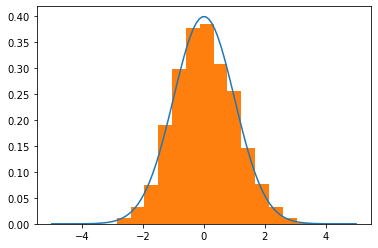

In [39]:
normalized_samples = samples/sigma

xplot = np.linspace(-5,5,num=100)
plt.plot(xplot,stats.norm.pdf(xplot))
plt.hist(normalized_samples, density=True,bins=15)
plt.show()

The asymptotic variance of $\widehat{\mu}_n$ on the other hand is $\mathrm{Var}[X_1] = \mu^2 = 9$, which is much smaller.

# Maximum Likelihood and Optimization

The file "lifetimes.txt" contains some lifetime measures for $n=20$ industrial materials, the values are in thousands of hours. We import the dataset using the pandas library.

In [48]:
df = pd.read_csv('lifetimes.txt')
df.head(5)

,times
0,1.6
1,1.3
2,1.1
3,0.8
4,1.1


In [49]:
df.describe()

,times
count,20.000000
mean,0.885000
std,0.423364
min,0.100000
25%,0.600000
50%,0.800000
75%,1.300000
max,1.600000


In [50]:
# the n-sample we are interested in
X=df['times']

In reliability studies, it is common to use a Weibull distribution (which is the generalization of an exponential distribution), whose density is given for some parameter $c>0$ by 
$$f_c(x)=cx^{c-1}\exp(-x^c)\mathbb{1}_{[0,+\infty[}(x)$$
In scipy.stats this distribution is called weibull_min

**Define a function called `weibull_neg_log_likelihood` that computes the negative log-likelihood for a weibull model from the $n$-sample $X$. Plot the negative log-likelihood (which is to be minimized) on $[0.1,5]$.**

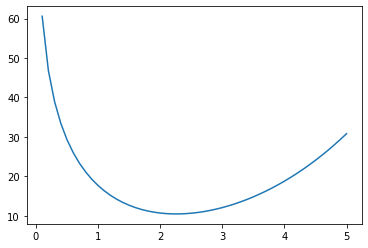

In [51]:
def weibull_neg_log_likelihood(c):
    return -np.sum(np.log(c*X**(c-1)*np.exp(-X**c))) 

xplot=np.linspace(0.1,5)
plt.plot(xplot,[weibull_neg_log_likelihood(x) for x in xplot])
plt.show()

This plot show that $-\log L(X;c)$ has a global minimum on $[0,5]$. To find it we could find the zero of the derivative analytically, but this is actually not that easy. Hence, we will instead use an iterative optimization algorithm implemented in the optimization package of scipy, called [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). 

In [52]:
from scipy.optimize import minimize 

initial_value = 5 # initial value required by the optimization algorithm
result = minimize(weibull_neg_log_likelihood,initial_value,options={ 'disp': True}) 
# do the minimization, display informations on the convergence.

Optimization terminated successfully.
         Current function value: 10.499847
         Iterations: 6
         Function evaluations: 14
         Gradient evaluations: 7


In [53]:
# result of minimize is an object with several attributes, including the minimizer itself
print(result)

      fun: 10.499846790820662
 hess_inv: array([[0.15478172]])
      jac: array([3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([2.25871245])


In [65]:
c_mle = result.x[0]
print("the mle is", c_mle)

the mle is 2.2587124507323186


**Do you think the learnt model fits well the data?**

You can visualize an histogram of your data together with the density of $f_{c_{mle}}$, compare the empirical cdf and the true cdf, or use a qqplot.

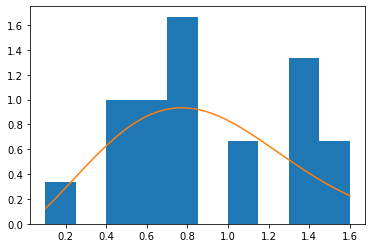

In [70]:
plt.hist(X, density=True, bins=10)
xplot = np.linspace(np.min(X), np.max(X))
law = stats.weibull_min(c_mle) 
plt.plot(xplot,law.pdf(xplot))

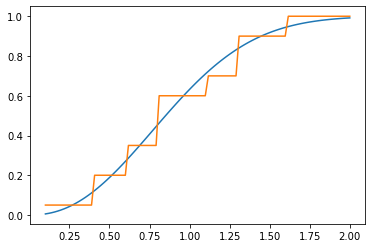

In [71]:
def empirical_cdf(t):
    return np.sum(X<=t)/20

xplot = np.linspace(0.1,2,num=100)
plt.plot(xplot,law.cdf(xplot),label="cdf of the optimal Weibull distribution")
plt.plot(xplot,[empirical_cdf(t) for t in xplot],label="empirical cdf")
plt.show()

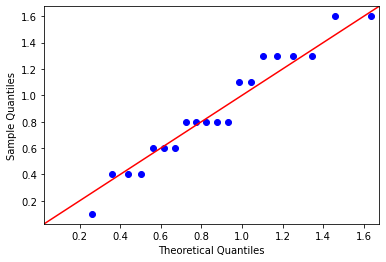

In [72]:
sm.qqplot(X, stats.weibull_min(c_mle), line='45')
plt.show()

The fit is not that bad for 20 data points...